In [1]:
#  Write only one for a notebook
import sqlite3
conn = sqlite3.connect('test.db')
cur = conn.cursor()


%load_ext sql
%sql sqlite:///test.db
%reload_ext sql

In [2]:
%%sql
DROP TABLE IF EXISTS icc_world_cup ;
create table icc_world_cup
(
match_no int,
team_1 Varchar(20),
team_2 Varchar(20),
winner Varchar(20)
);

-- Insert values into the table
INSERT INTO icc_world_cup values(1,'ENG','NZ','NZ');
INSERT INTO icc_world_cup values(2,'PAK','NED','PAK');
INSERT INTO icc_world_cup values(3,'AFG','BAN','BAN');
INSERT INTO icc_world_cup values(4,'SA','SL','SA');
INSERT INTO icc_world_cup values(5,'AUS','IND','IND');
INSERT INTO icc_world_cup values(6,'NZ','NED','NZ');
INSERT INTO icc_world_cup values(7,'ENG','BAN','ENG');
INSERT INTO icc_world_cup values(8,'SL','PAK','PAK');
INSERT INTO icc_world_cup values(9,'AFG','IND','IND');
INSERT INTO icc_world_cup values(10,'SA','AUS','SA');
INSERT INTO icc_world_cup values(11,'BAN','NZ','NZ');
INSERT INTO icc_world_cup values(12,'PAK','IND','IND');
INSERT INTO icc_world_cup values(13,'SA','IND','DRAW');


 * sqlite:///test.db
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

**Problem Statement 1** : For all the cricket enthusiasts and SQL learners out there Ever wondered how to create an 𝐈𝐂𝐂 𝐂𝐫𝐢𝐜𝐤𝐞𝐭 𝐖𝐨𝐫𝐥𝐝 𝐂𝐮𝐩 𝟐𝟎𝟐𝟑 𝐩𝐨𝐢𝐧𝐭𝐬 𝐭𝐚𝐛𝐥𝐞 using SQL?
*  **Write a SQL query to derive ICC Cricket World Cup 2023 points table considering number of matches played, wins, losses, draws?**  




In [4]:
%%sql
WITH cte2 AS (
    WITH cte1 AS (
    SELECT team_1, winner FROM icc_world_cup
    UNION ALL
    SELECT team_2, winner FROM icc_world_cup )
    SELECT *,
    CASE
        WHEN team_1 = winner THEN 1
        ELSE  0
    END win ,
    CASE
        WHEN winner = "DRAW" THEN 1
        ELSE  0
    END draw ,
    CASE
        WHEN team_1 <> winner AND winner <> "draw" THEN 1
        ELSE  0
    END loss
    FROM cte1 )
SELECT team_1 team, SUM(win)+SUM(draw)+SUM(loss) total_matches,
SUM(win) total_wins, SUM(draw) total_draws, SUM(loss) total_losts,
2*SUM(win)+1*SUM(draw)+0*SUM(loss) points
FROM cte2
GROUP BY team_1
ORDER BY points DESC ;


 * sqlite:///test.db
Done.


team,total_matches,total_wins,total_draws,total_losts,points
IND,5,3,1,1,7
NZ,3,3,0,0,6
SA,4,2,1,1,5
PAK,3,2,0,1,4
ENG,2,1,0,1,2
BAN,3,1,0,2,2
SL,2,0,0,2,0
NED,2,0,0,2,0
AUS,2,0,0,2,0
AFG,2,0,0,2,0


**Problem Statement 2** : We have two tables - 𝐩𝐞𝐨𝐩𝐥𝐞 𝐚𝐧𝐝 𝐫𝐞𝐥𝐚𝐭𝐢𝐨𝐧𝐬. The 𝐩𝐞𝐨𝐩𝐥𝐞 𝐭𝐚𝐛𝐥𝐞 𝐜𝐨𝐧𝐭𝐚𝐢𝐧𝐬 𝐭𝐡𝐞 𝐝𝐞𝐭𝐚𝐢𝐥𝐬 𝐨𝐟 𝐞𝐚𝐜𝐡 𝐢𝐧𝐝𝐢𝐯𝐢𝐝𝐮𝐚𝐥 and the 𝐫𝐞𝐥𝐚𝐭𝐢𝐨𝐧𝐬 𝐭𝐚𝐛𝐥𝐞 𝐜𝐨𝐧𝐭𝐚𝐢𝐧𝐬 𝐭𝐡𝐞 𝐩𝐚𝐫𝐞𝐧𝐭-𝐜𝐡𝐢𝐥𝐝 𝐫𝐞𝐥𝐚𝐭𝐢𝐨𝐧𝐬𝐡𝐢𝐩 𝐛𝐞𝐭𝐰𝐞𝐞𝐧 𝐭𝐰𝐨 𝐢𝐧𝐝𝐢𝐯𝐢𝐝𝐮𝐚𝐥𝐬. Write an SQL query that 𝐩𝐫𝐢𝐧𝐭𝐬 𝐭𝐡𝐞 𝐧𝐚𝐦𝐞𝐬 𝐨𝐟 𝐚 𝐜𝐡𝐢𝐥𝐝 𝐚𝐧𝐝 𝐡𝐢𝐬 𝐩𝐚𝐫𝐞𝐧𝐭𝐬 𝐢𝐧 𝐢𝐧𝐝𝐢𝐯𝐢𝐝𝐮𝐚𝐥 𝐜𝐨𝐥𝐮𝐦𝐧𝐬 𝐫𝐞𝐬𝐩𝐞𝐜𝐭𝐢𝐯𝐞𝐥𝐲 𝐢𝐧 𝐨𝐫𝐝𝐞𝐫 𝐨𝐟 𝐭𝐡𝐞 𝐧𝐚𝐦𝐞 𝐨𝐟 𝐭𝐡𝐞 𝐜𝐡𝐢𝐥𝐝 𝐚𝐬 𝐬𝐡𝐨𝐰𝐧 𝐢𝐧 𝐭𝐡𝐞 𝐩𝐢𝐜𝐭𝐮𝐫𝐞.

In [5]:
%%sql
create table people(id int primary key not null,
name varchar(20),
gender char(2));

create table relations(c_id int,
p_id int,
FOREIGN KEY (c_id) REFERENCES people(id),
foreign key (p_id) references people(id)
);

insert into people (id, name, gender) values
(107,'Days','F'),
(145,'Hawbaker','M'),
(155,'Hansel','F'),
(202,'Blackston','M'),
(227,'Criss','F'),
(278,'Keffer','M'),
(305,'Canty','M'),
(329,'Mozingo','M'),
(425,'Nolf','M'),
(534,'Waugh','M'),
(586,'Tong','M'),
(618,'Dimartino','M'),
(747,'Beane','M'),
(878,'Chatmon','F'),
(904,'Hansard','F');

insert into relations(c_id, p_id) values
(145, 202),
(145, 107),
(278,305),
(278,155),
(329, 425),
(329,227),
(534,586),
(534,878),
(618,747),
(618,904);


 * sqlite:///test.db
Done.
Done.
15 rows affected.
10 rows affected.


[]

In [7]:
%%sql
WITH cte1 AS (SELECT a.name child, b.name Father FROM people a, people b, relations c
    WHERE
    a.id=c.c_id AND
    b.id = c.p_id AND
    b.gender = 'M' ),
cte2 AS (SELECT a.name child, b.name Mother FROM people a, people b, relations c
    WHERE
    a.id=c.c_id AND
    b.id = c.p_id AND
    b.gender = 'F' )
SELECT cte1.child, Father, Mother FROM
cte1, cte2
WHERE
cte1.child = cte2.child
ORDER BY cte1.child;

 * sqlite:///test.db
Done.


child,Father,Mother
Dimartino,Beane,Hansard
Hawbaker,Blackston,Days
Keffer,Canty,Hansel
Mozingo,Nolf,Criss
Waugh,Tong,Chatmon


**Problem Statement 3** :  Write an SQL query 𝐭𝐨 𝐟𝐢𝐧𝐝 𝐭𝐨𝐭𝐚𝐥 𝐧𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐜𝐥𝐨𝐜𝐤𝐞𝐝 𝐡𝐨𝐮𝐫𝐬 𝐟𝐨𝐫 𝐞𝐚𝐜𝐡 𝐞𝐦𝐩𝐥𝐨𝐲𝐞𝐞(𝐢𝐧𝐬𝐢𝐝𝐞 𝐭𝐡𝐞 𝐨𝐟𝐟𝐢𝐜𝐞), 𝐟𝐥𝐚𝐠 - 𝐈 𝐦𝐞𝐚𝐧𝐬 𝐩𝐮𝐧𝐜𝐡 𝐢𝐧 𝐚𝐧𝐝 𝐎 𝐦𝐞𝐚𝐧𝐬 𝐩𝐮𝐧𝐜𝐡 𝐨𝐮𝐭. 𝐄𝐦𝐩𝐥𝐨𝐲𝐞𝐞 𝐜𝐚𝐧 𝐝𝐨 𝐦𝐮𝐥𝐭𝐢𝐩𝐥𝐞 𝐩𝐮𝐧𝐜𝐡 𝐢𝐧 𝐚𝐧𝐝 𝐩𝐮𝐧𝐜𝐡 𝐨𝐮𝐭 𝐢𝐧 𝐚 𝐝𝐚𝐲. for each punch in there will be a punch out.


In [8]:
%%sql
create table clocked_hours(
empd_id int,
swipe time,
flag char
);
insert into clocked_hours values
(11114,'08:30','I'),
(11114,'10:30','O'),
(11114,'11:30','I'),
(11114,'15:30','O'),
(11115,'09:30','I'),
(11115,'17:30','O');


 * sqlite:///test.db
Done.
6 rows affected.


[]

In [11]:
%%sql
WITH cte1 AS (
    SELECT empd_id, swipe AS punch_in, ROW_NUMBER() OVER() rn1
    FROM clocked_hours
    WHERE flag = "I"
),
cte2 AS (
    SELECT empd_id, swipe AS punch_out, ROW_NUMBER() OVER() rn2
    FROM clocked_hours
    WHERE flag = "O"
)
SELECT
    cte1.empd_id,
    ROUND(SUM((strftime('%s', punch_out) - strftime('%s', punch_in)))/3600, 2) AS clocked_hrs
FROM cte1
INNER JOIN cte2
    ON cte1.rn1 = cte2.rn2
GROUP BY cte1.empd_id;

 * sqlite:///test.db
Done.


empd_id,clocked_hrs
11114,6.0
11115,8.0


**Problem Statement 4** : You are given 𝐚 𝐭𝐚𝐛𝐥𝐞 𝐡𝐚𝐯𝐢𝐧𝐠 𝐭𝐡𝐞 𝐦𝐚𝐫𝐤𝐬 𝐨𝐟 𝐨𝐧𝐞 𝐬𝐭𝐮𝐝𝐞𝐧𝐭 𝐢𝐧 𝐞𝐯𝐞𝐫𝐲 𝐭𝐞𝐬𝐭. 𝐘𝐨𝐮 𝐡𝐚𝐯𝐞 𝐭𝐨 𝐨𝐮𝐭𝐩𝐮𝐭 𝐭𝐡𝐞 𝐭𝐞𝐬𝐭𝐬 𝐢𝐧 𝐰𝐡𝐢𝐜𝐡 𝐭𝐡𝐞 𝐬𝐭𝐮𝐝𝐞𝐧𝐭 𝐡𝐚𝐬 𝐢𝐦𝐩𝐫𝐨𝐯𝐞𝐝 𝐡𝐢𝐬 𝐩𝐞𝐫𝐟𝐨𝐫𝐦𝐚𝐧𝐜𝐞. 𝐅𝐨𝐫 𝐚 𝐬𝐭𝐮𝐝𝐞𝐧𝐭 𝐭𝐨 𝐢𝐦𝐩𝐫𝐨𝐯𝐞 𝐡𝐢𝐬 𝐩𝐞𝐫𝐟𝐨𝐫𝐦𝐚𝐧𝐜𝐞 𝐡𝐞 𝐡𝐚𝐬 𝐭𝐨 𝐬𝐜𝐨𝐫𝐞 𝐦𝐨𝐫𝐞 𝐭𝐡𝐚𝐧 𝐭𝐡𝐞 𝐩𝐫𝐞𝐯𝐢𝐨𝐮𝐬 𝐭𝐞𝐬𝐭. 𝐏𝐫𝐨𝐯𝐢𝐝𝐞 𝟐 𝐬𝐨𝐥𝐮𝐭𝐢𝐨𝐧𝐬, 𝐨𝐧𝐞 𝐢𝐧𝐜𝐥𝐮𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐟𝐢𝐫𝐬𝐭 𝐭𝐞𝐬𝐭 𝐬𝐜𝐨𝐫𝐞 𝐚𝐧𝐝 𝐬𝐞𝐜𝐨𝐧𝐝 𝐞𝐱𝐜𝐥𝐮𝐝𝐢𝐧𝐠 𝐢𝐭.


In [12]:
%%sql
create table student_tests(test_id int, marks int);
insert into student_tests values(100, 55);
insert into student_tests values(101, 55);
insert into student_tests values(102, 60);
insert into student_tests values(103, 58);
insert into student_tests values(104, 40);
insert into student_tests values(105, 50);



 * sqlite:///test.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [16]:
%%sql
WITH cte AS (
    SELECT * ,marks-LAG(marks) OVER() a
    FROM student_tests )
SELECT test_id, marks FROM cte WHERE a>0 OR a IS NULL ;


 * sqlite:///test.db
Done.


test_id,marks
100,55
102,60
105,50


In [17]:
%%sql
WITH cte AS (
    SELECT * ,marks-LAG(marks) OVER() a
    FROM student_tests )
SELECT test_id, marks FROM cte WHERE a > 0 AND a IS NOT NULL;


 * sqlite:///test.db
Done.


test_id,marks
102,60
105,50


**Problem Statement 5** : (𝐆𝐞𝐧𝐞𝐫𝐚𝐭𝐞 𝐬𝐚𝐥𝐚𝐫𝐲 𝐫𝐞𝐩𝐨𝐫𝐭):
Using the given Salary, Income and Deduction tables, first write an sql query to populate the **Emp_Transaction table**
and then **generate a salary report**

In [18]:
%%sql
create table salary(emp_id int, emp_name varchar(30), base_salary int);
insert into salary values(1, 'Rohan', 5000), (2, 'Alex', 6000), (3, 'Maryam', 7000);

create table income(id int, income varchar(20), percentage int);
insert into income values(1,'Basic', 100), (2,'Allowance', 4), (3,'Others', 6);

create table deduction(id int, deduction varchar(20), percentage int);
insert into deduction values(1,'Insurance', 5), (2,'Health', 6), (3,'House', 4);


 * sqlite:///test.db
Done.
3 rows affected.
Done.
3 rows affected.
Done.
3 rows affected.


[]

In [19]:
%%sql
WITH cte AS (
  SELECT emp_name,
  ROUND(base_salary*(SELECT percentage FROM income WHERE income = "Basic")/100, 2) Basic,
  ROUND(base_salary*(SELECT percentage FROM income WHERE income = "Allowance")/100, 2) Allowance,
  ROUND(base_salary*(SELECT percentage FROM income WHERE income = "Others")/100, 2) Others,
  ROUND(base_salary*(SELECT percentage FROM deduction WHERE deduction = "Insurance")/100, 2) Insurance,
  ROUND(base_salary*(SELECT percentage FROM deduction WHERE deduction = "Health")/100, 2) Health,
  ROUND(base_salary*(SELECT percentage FROM deduction WHERE deduction = "House")/100, 2) House
  FROM salary
)
SELECT emp_name,Basic, Allowance, Others, basic+Allowance+Others Gross, Insurance, Health,House,Insurance+Health+House Total_Deductions,
basic+Allowance+Others-Insurance-Health-House  Net_Pay
FROM cte ORDER BY emp_name;


 * sqlite:///test.db
Done.


emp_name,Basic,Allowance,Others,Gross,Insurance,Health,House,Total_Deductions,Net_Pay
Alex,6000.0,240.0,360.0,6600.0,300.0,360.0,240.0,900.0,5700.0
Maryam,7000.0,280.0,420.0,7700.0,350.0,420.0,280.0,1050.0,6650.0
Rohan,5000.0,200.0,300.0,5500.0,250.0,300.0,200.0,750.0,4750.0


**Problem Statement 6** : Write an SQL query 𝐭𝐨 𝐫𝐞𝐭𝐮𝐫𝐧 𝐭𝐡𝐞 𝐟𝐨𝐨𝐭𝐞𝐫 𝐯𝐚𝐥𝐮𝐞𝐬 𝐟𝐫𝐨𝐦 𝐢𝐧𝐩𝐮𝐭 𝐭𝐚𝐛𝐥𝐞, 𝐦𝐞𝐚𝐧𝐢𝐧𝐠 𝐚𝐥𝐥 𝐭𝐡𝐞 𝐥𝐚𝐬𝐭 𝐧𝐨𝐧 𝐧𝐮𝐥𝐥 𝐯𝐚𝐥𝐮𝐞𝐬 𝐟𝐫𝐨𝐦 𝐞𝐚𝐜𝐡 𝐟𝐢𝐞𝐥𝐝 𝐚𝐬 𝐬𝐡𝐨𝐰𝐧 𝐢𝐧 𝐞𝐱𝐩𝐞𝐜𝐭𝐞𝐝 𝐨𝐮𝐭𝐩𝐮𝐭.


In [20]:
%%sql
CREATE TABLE footer
(
id INT PRIMARY KEY,
car VARCHAR(20),
length INT,
width INT,
height INT
);
INSERT INTO footer VALUES (1, 'Hyundai Tucson', 15, 6, NULL);
INSERT INTO footer VALUES (2, NULL, NULL, NULL, 20);
INSERT INTO footer VALUES (3, NULL, 12, 8, 15);
INSERT INTO footer VALUES (4, 'Toyota Rav4', NULL, 15, NULL);
INSERT INTO footer VALUES (5, 'Kia Sportage', NULL, NULL, 18);

 * sqlite:///test.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [22]:
%%sql
SELECT
    (SELECT car FROM footer WHERE car IS NOT NULL ORDER BY id DESC LIMIT 1) AS car,
    (SELECT length FROM footer WHERE length IS NOT NULL ORDER BY id DESC LIMIT 1) AS length,
    (SELECT width FROM footer WHERE width IS NOT NULL ORDER BY id DESC LIMIT 1) AS width,
    (SELECT height FROM footer WHERE height IS NOT NULL ORDER BY id DESC LIMIT 1) AS height;

 * sqlite:///test.db
Done.


car,length,width,height
Kia Sportage,12,15,18


**Problem Statement 7 : Write a query that outputs the name of the credit card, and how many cards were issued in its launch month. The launch month is the earliest record in the monthly_card_issued table for a given card. Order the results starting from the biggest issued amount**.


In [23]:
%%sql
CREATE TABLE monthly_card_issued (
  issue_month INTEGER,
  issue_year INTEGER,
  card_name varchar(50),
  issued_amount INTEGER
);


INSERT INTO monthly_card_issued (card_name, issued_amount, issue_month, issue_year)
VALUES
  ('Chase Sapphire Reserve', 160000, 12, 2020),
  ('Chase Sapphire Reserve', 170000, 1, 2021),
  ('Chase Sapphire Reserve', 175000, 2, 2021),
  ('Chase Sapphire Reserve', 180000, 3, 2021),
  ('Chase Freedom Flex', 55000, 1, 2021),
  ('Chase Freedom Flex', 60000, 2, 2021),
  ('Chase Freedom Flex', 65000, 3, 2021),
  ('Chase Freedom Flex', 70000, 4, 2021),
  ('Chase Sapphire Reserve', 150000, 11, 2020);

 * sqlite:///test.db
Done.
9 rows affected.


[]

In [24]:
%%sql
WITH cte AS (
    SELECT card_name, issued_amount,
    ROW_NUMBER()OVER(PARTITION BY card_name ORDER BY issue_year, issue_month) rn
    FROM monthly_card_issued )
SELECT card_name, issued_amount FROM cte
WHERE rn = 1
ORDER BY issued_amount DESC;

 * sqlite:///test.db
Done.


card_name,issued_amount
Chase Sapphire Reserve,150000
Chase Freedom Flex,55000


**Problem Statement 8 : Write an sql to find employees whose salary is greater than their managers salary**.

In [25]:
%%sql
CREATE TABLE Employees
(
 EmpID  INT,
 EmpName  VARCHAR(100),
 Salary  INT,
 ManagerID INT
);

INSERT INTO Employees (EmpID,EmpName,Salary,ManagerID)
SELECT 1,'Bala',1000,7
UNION ALL
SELECT 2,'Abhay',1500,1
UNION ALL
SELECT 3,'Lakshman',1500,6
UNION ALL
SELECT 4,'Dileep',2000,7
UNION ALL
SELECT 5,'Rajesh',4000,6
UNION ALL
SELECT 6,'Raviteja',3000,7
UNION ALL
SELECT 7,'Vijay',3500,null
UNION ALL
SELECT 8,'Rakesh',3500,7

 * sqlite:///test.db
Done.
8 rows affected.


[]

In [26]:
%%sql
WITH cte AS (
    SELECT b.EmpID emp_ID, b.EmpName Emp_Name, b.Salary Emp_salary ,
    a.EmpID Manager_ID, a.EmpName Manager_name, a.Salary Manager_salary
    FROM employees a
    INNER JOIN
    employees b
    ON a.EmpID = b.ManagerID )
SELECT Emp_Name EmpName, Emp_salary Salary FROM cte WHERE Emp_salary > Manager_salary;

 * sqlite:///test.db
Done.


EmpName,Salary
Abhay,1500
Rajesh,4000


**Problem Statement 9 : Given the Employee table, write a SQL query that finds out managers with at least 5 direct reportee**.

In [27]:
%%sql
Create table If Not Exists Employee (
Id int,
Name varchar(255),
Department varchar(255),
ManagerId int
);

insert into Employee(Id, Name, Department, ManagerId) values
('101', 'John', 'A', Null),
('102', 'Dan', 'A', '101'),
('103', 'James', 'A', '101'),
('104', 'Amy', 'A', '101'),
('105', 'Anne', 'A', '101'),
('106', 'Ron', 'B', '101'),
('107', 'Tony', 'C', '103'),
('108', 'Rocky', 'C', '103');

 * sqlite:///test.db
Done.
8 rows affected.


[]

In [29]:
%%sql
WITH cte AS (
    select a.Name, a.Department  from employee a
    INNER JOIN
    employee b
    ON a.Id = b.ManagerId )
SELECT Name FROM cte GROUP BY Name HAVING COUNT(Department) >= 5 ;

 * sqlite:///test.db
Done.


Name
John


**Problem Statement 10** : Write a sql query to find the products **whose sales increased every year.**
include the product_id, product_name, category.


In [30]:
%%sql
CREATE TABLE products (
 product_id INT PRIMARY KEY,
 product_name VARCHAR(50),
 category VARCHAR(50)
);

INSERT INTO products (product_id, product_name, category) VALUES
 (1, 'Laptops', 'Electronics'),
 (2, 'Jeans', 'Clothing'),
 (3, 'Chairs', 'Home Appliances');

CREATE TABLE sales (
 product_id INT,
 year INT,
 total_sales_revenue DECIMAL(10, 2),
 PRIMARY KEY (product_id, year),
 FOREIGN KEY (product_id) REFERENCES products(product_id)
);
INSERT INTO sales (product_id, year, total_sales_revenue) VALUES
 (1, 2019, 1000.00),
 (1, 2020, 1200.00),
 (1, 2021, 1100.00),
 (2, 2019, 500.00),
 (2, 2020, 600.00),
 (2, 2021, 900.00),
 (3, 2019, 300.00),
 (3, 2020, 450.00),
 (3, 2021, 400.00);

 * sqlite:///test.db
Done.
3 rows affected.
Done.
9 rows affected.


[]

In [31]:
%%sql
WITH cte1 AS (WITH cte AS (
                    SELECT *, IFNULL(total_sales_revenue-LAG(total_sales_revenue)OVER(PARTITION BY product_id),0) diff,
                    ROW_NUMBER() OVER(PARTITION BY product_id) rn  FROM sales )
                SELECT *, COUNT(rn)OVER(PARTITION BY product_id) rn1 FROM cte
                WHERE diff >= 0)
SELECT DISTINCT p.product_id,p.product_name, p.category FROM cte1
INNER JOIN
products p
ON cte1.product_id = p.product_id
WHERE rn1 in (SELECT COUNT(year) FROM sales GROUP BY product_id) ;

 * sqlite:///test.db
Done.


product_id,product_name,category
2,Jeans,Clothing


**Problem Statement 11 : Write a SQL query to find the highest grade with its corresponding course for each student. In case of a tie, you should find the course with the smallest course_id. The output must be sorted by increasing student_id.**


In [32]:
%%sql
Create table If Not Exists Enrollments
(student_id int,
course_id int,
grade int
);

insert into Enrollments (student_id, course_id, grade) values ('2', '2', '95') ,
('2', '3', '95'),
('1', '1', '90'),
('1', '2', '99'),
('3', '1', '80'),
('3', '2', '75'),
('3', '3', '82');

 * sqlite:///test.db
Done.
7 rows affected.


[]

In [33]:
%%sql
with cte2 AS (
    WITH cte AS(
        SELECT *, MAX(grade) OVER(PARTITION BY student_id) max_grade
        FROM Enrollments )
    SELECT *, ROW_NUMBER() OVER(PARTITION BY student_id ORDER BY course_id )rn FROM cte
    WHERE grade=max_grade )
SELECT student_id, course_id, grade FROM cte2
WHERE rn = 1
ORDER BY student_id ASC;

 * sqlite:///test.db
Done.


student_id,course_id,grade
1,2,99
2,2,95
3,3,82


**Problem Statement 12 :write a query to get the output**.


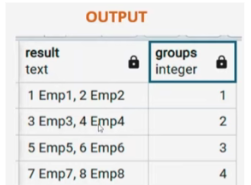

In [34]:
%%sql
CREATE TABLE emp (ID int, NAME varchar(10));

INSERT INTO emp (ID, NAME)
VALUES (1,'Emp1'), (2,'Emp2'), (3,'Emp3'), (4,'Emp4'),
(5,'Emp5'), (6,'Emp6'), (7,'Emp7'), (8,'Emp8');

 * sqlite:///test.db
Done.
8 rows affected.


[]

In [36]:
%%sql
WITH cte3 AS (
    WITH cte1 AS (
        SELECT ROW_NUMBER() OVER() rn1, ID || ' ' || NAME AS combo1
        FROM emp
        WHERE MOD(ID, 2) = 1
    ),
    cte2 AS (
        SELECT ROW_NUMBER() OVER() rn2, ID || ' ' || NAME AS combo2
        FROM emp
        WHERE MOD(ID, 2) = 0
    )
    SELECT combo1 || ' , ' || combo2 AS results
    FROM cte1
    INNER JOIN cte2
    ON rn1 = rn2
)
SELECT *, ROW_NUMBER() OVER() AS `groups`
FROM cte3;

 * sqlite:///test.db
Done.


results,groups
"1 Emp1 , 2 Emp2",1
"3 Emp3 , 4 Emp4",2
"5 Emp5 , 6 Emp6",3
"7 Emp7 , 8 Emp8",4


**Problem Statement 13 : Find the origin and final destination for each cid**.


In [42]:
%%sql
CREATE TABLE flights
(
    cid VARCHAR(512),
    fid VARCHAR(512),
    origin VARCHAR(512),
    Destination VARCHAR(512)
);

INSERT INTO flights (cid, fid, origin, Destination) VALUES ('1', 'f1', 'Del', 'Hyd');
INSERT INTO flights (cid, fid, origin, Destination) VALUES ('1', 'f2', 'Hyd', 'Blr');
INSERT INTO flights (cid, fid, origin, Destination) VALUES ('2', 'f3', 'Mum', 'Agra');
INSERT INTO flights (cid, fid, origin, Destination) VALUES ('2', 'f4', 'Agra', 'Kol');

 * sqlite:///test.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [43]:
%%sql
SELECT a.cid, a.origin, b.Destination final_destination FROM flights a, flights b WHERE
a.Destination = b.origin

 * sqlite:///test.db
Done.


cid,origin,final_destination
1,Del,Blr
2,Mum,Kol


**Problem Statement 14 : Find the count of new customers added in each month**.

In [45]:
%%sql
DROP TABLE IF EXISTS sales;
CREATE TABLE sales
(
    order_date date,
    customer VARCHAR(512),
    qty INT
);

INSERT INTO sales (order_date, customer, qty) VALUES ('2021-01-01', 'C1', '20');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-01-01', 'C2', '30');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-02-01', 'C1', '10');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-02-01', 'C3', '15');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-03-01', 'C5', '19');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-03-01', 'C4', '10');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-04-01', 'C3', '13');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-04-01', 'C5', '15');
INSERT INTO sales (order_date, customer, qty) VALUES ('2021-04-01', 'C6', '10');


 * sqlite:///test.db
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [46]:
%%sql
WITH cte1 AS(
   WITH cte AS (
        SELECT *, ROW_NUMBER() OVER(PARTITION BY customer ORDER BY order_date) rn FROM sales)
    SELECT order_date, rn FROM cte WHERE rn = 1 )
SELECT order_date, SUM(rn) count_new_cust FROM cte1 GROUP BY order_date ;


 * sqlite:///test.db
Done.


order_date,count_new_cust
2021-01-01,2
2021-02-01,1
2021-03-01,2
2021-04-01,1


**Problem Statement 15** : Write an SQL query to find companies who have 𝐚𝐭 𝐥𝐞𝐚𝐬𝐭 𝟐 𝐮𝐬𝐞𝐫𝐬 𝐰𝐡𝐨 𝐬𝐩𝐞𝐚𝐤𝐬 𝐄𝐧𝐠𝐥𝐢𝐬𝐡 𝐚𝐧𝐝 𝐆𝐞𝐫𝐦𝐚𝐧 both the languages.

In [51]:
%%sql
create table company_users
(
company_id int,
user_id int,
language varchar(20)
);
insert into company_users values (1,1,'English')
,(1,1,'German')
,(1,2,'English')
,(1,3,'German')
,(1,3,'English')
,(1,4,'English')
,(2,5,'English')
,(2,5,'German')
,(2,5,'Spanish')
,(2,6,'German')
,(2,6,'Spanish')
,(2,7,'English');

 * sqlite:///test.db
Done.
12 rows affected.


[]

In [52]:
%%sql
WITH cte1 AS (SELECT * FROM company_users WHERE language = "English" ) ,
cte2 AS (SELECT * FROM company_users WHERE language = "German" )

SELECT cte1.company_id FROM cte1
INNER JOIN cte2
ON cte1.company_id = cte2.company_id AND cte1.user_id = cte2.user_id
GROUP BY cte1.company_id
HAVING COUNT(cte1.user_id) >= 2 ;


 * sqlite:///test.db
Done.


company_id
1


Problem Statement 16 : Write a query to retrieve a list of employees who earn 𝐦𝐨𝐫𝐞 𝐭𝐡𝐚𝐧 𝐭𝐡𝐞 𝐚𝐯𝐞𝐫𝐚𝐠𝐞 𝐬𝐚𝐥𝐚𝐫𝐲 within their respective departments.



In [56]:
%%sql
DROP TABLE IF EXISTS Employee;
CREATE TABLE Employee (
EmployeeID INT PRIMARY KEY,
FirstName VARCHAR(50),
LastName VARCHAR(50),
Department VARCHAR(50),
Salary DECIMAL(10, 2)
);
INSERT INTO Employee VALUES
(1, 'John', 'Doe', 'HR', 55000.00),
(2, 'Jane', 'Smith', 'IT', 60000.00),
(3, 'Richard', 'Johnson', 'Finance', 68000.00),
(4, 'Emily', 'Davis', 'IT', 52000.00),
(5, 'Michael', 'Wilson', 'HR', 58000.00),
(6, 'Maria', 'Brown', 'Marketing', 54000.00),
(7, 'David', 'Lee', 'Finance', 72000.00),
(8, 'Sarah', 'Clark', 'Marketing', 56000.00),
(9, 'James', 'White', 'IT', 61000.00),
(10, 'Laura', 'Anderson', 'HR', 57000.00);


 * sqlite:///test.db
Done.
Done.
10 rows affected.


[]

In [57]:
%%sql
WITH cte AS
( SELECT Department, FirstName, LastName, Salary,
AVG(Salary) OVER(PARTITION BY Department) avg_dept_salary
FROM employee )
SELECT * FROM cte
WHERE Salary > avg_dept_salary


 * sqlite:///test.db
Done.


Department,FirstName,LastName,Salary,avg_dept_salary
Finance,David,Lee,72000,70000.0
HR,Michael,Wilson,58000,56666.666666666664
HR,Laura,Anderson,57000,56666.666666666664
IT,Jane,Smith,60000,57666.666666666664
IT,James,White,61000,57666.666666666664
Marketing,Sarah,Clark,56000,55000.0


**Problem Statement 17** : Write an SQL query to show the 𝐬𝐞𝐜𝐨𝐧𝐝 𝐦𝐨𝐬𝐭 𝐫𝐞𝐜𝐞𝐧𝐭 𝐚𝐜𝐭𝐢𝐯𝐢𝐭𝐲 𝐨𝐟 𝐞𝐚𝐜𝐡 𝐮𝐬𝐞𝐫.If the user only has one activity, return that one. A user 𝐜𝐚𝐧'𝐭 𝐩𝐞𝐫𝐟𝐨𝐫𝐦 𝐦𝐨𝐫𝐞 𝐭𝐡𝐚𝐧 𝐨𝐧𝐞 𝐚𝐜𝐭𝐢𝐯𝐢𝐭𝐲 𝐚𝐭 𝐭𝐡𝐞 𝐬𝐚𝐦𝐞 𝐭𝐢𝐦𝐞.


In [58]:
%%sql
create table UserActivity(
username varchar(20) ,
activity varchar(20),
startDate Date ,
endDate Date
);
insert into UserActivity values
('Alice','Travel','2020-02-12','2020-02-20')
,('Alice','Dancing','2020-02-21','2020-02-23')
,('Alice','Travel','2020-02-24','2020-02-28')
,('Bob','Travel','2020-02-11','2020-02-18');


 * sqlite:///test.db
Done.
4 rows affected.


[]

In [59]:
%%sql
WITH cte AS
( SELECT * ,
ROW_NUMBER() OVER(PARTITION BY username ORDER BY `endDate` DESC) a,
CASE
    WHEN COUNT(activity) OVER(PARTITION BY username) = 1 THEN 1
    ELSE  2
END rn
FROM useractivity )
SELECT username, activity, startDate, endDate
FROM cte WHERE a = rn ;

 * sqlite:///test.db
Done.


username,activity,startDate,endDate
Alice,Dancing,2020-02-21,2020-02-23
Bob,Travel,2020-02-11,2020-02-18


**Problem Statement 18** :

*   **Part (a)Find Employees with a salary more than their manager's salary.**





In [61]:
%%sql
DROP TABLE IF EXISTS employee;
create table employee(
emp_id int,
emp_name varchar(20),
dept_id int,
salary int,
manager_id int,
emp_age int
);
insert into employee values(1,'Ankit',100,10000,4,39);
insert into employee values(2,'Mohit',100,15000,5,48);
insert into employee values(3,'Vikas',100,10000,4,37);
insert into employee values(4,'Rohit',100,5000,2,16);
insert into employee values(5,'Mudit',200,12000,6,55);
insert into employee values(6,'Agam',200,12000,2,14);
insert into employee values(7,'Sanjay',200,9000,2,13);
insert into employee values(8,'Ashish',200,5000,2,12);
insert into employee values(9,'Mukesh',300,6000,6,51);
insert into employee values(10,'Rakesh',500,7000,6,50);


 * sqlite:///test.db
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [62]:
%%sql
SELECT b.emp_name employee_name, a.emp_name manager_name, b.salary employee_salary, a.salary manager_salary
FROM employee a
INNER JOIN
employee b
on a.emp_id = b.manager_id
WHERE b.salary  > a.salary  ;


 * sqlite:///test.db
Done.


employee_name,manager_name,employee_salary,manager_salary
Ankit,Rohit,10000,5000
Vikas,Rohit,10000,5000
Mohit,Mudit,15000,12000


**Problem Statement 18 :
Part (b) Write a query to print emp name, manager name and senior manager name (senior manager is manager's manager).**


In [63]:
%%sql
SELECT a.emp_name employee_name, b.emp_name manager_name, c.emp_name senior_manager_name
FROM employee a
INNER JOIN
employee b ON a.manager_id = b.emp_id
INNER JOIN
employee c ON b.manager_id = c.emp_id
ORDER BY b.emp_id;


 * sqlite:///test.db
Done.


employee_name,manager_name,senior_manager_name
Rohit,Mohit,Mudit
Agam,Mohit,Mudit
Sanjay,Mohit,Mudit
Ashish,Mohit,Mudit
Ankit,Rohit,Mohit
Vikas,Rohit,Mohit
Mohit,Mudit,Agam
Mudit,Agam,Mohit
Mukesh,Agam,Mohit
Rakesh,Agam,Mohit
